# Introduction to time series data

You will continue to work with modules from pandas and matplotlib to plot dates more efficiently and with seaborn to make more attractive plots.

We will be following an ARIMA modeling procedure of the AirPassengers dataset as follows:
1. Perform exploratory data analysis
2. Decomposition of data
3. Bonus code

## Setup

In [1]:
# Import necessary packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

## 1. EDA

The data we will be working with today is the monthly totals of a US airline passengers from 1949 to 1960.

In [2]:
# Define relative path to file
file_path = os.path.join("data","AirPassengers.csv")

# Import file into pandas dataframe
df = pd.read_csv(file_path)

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.columns = ['Date','Number of Passengers']

df.head()

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


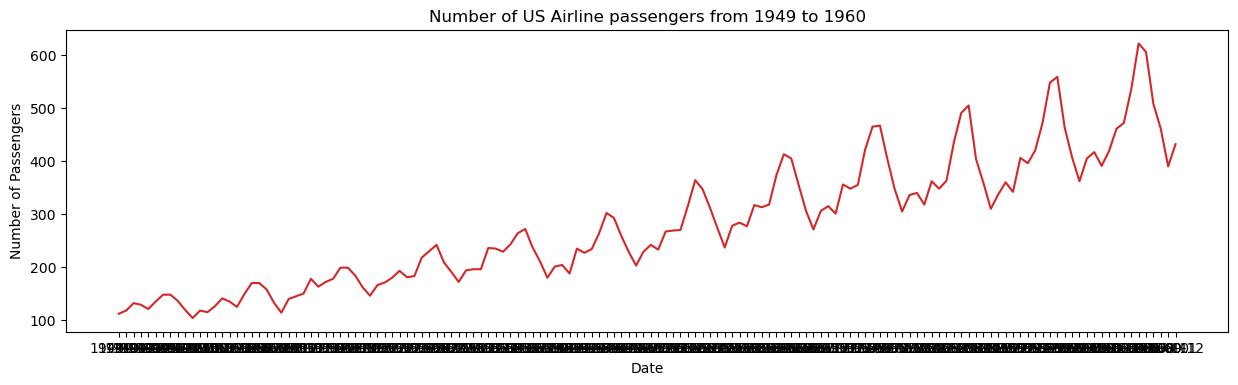

In [6]:
#Visualize the Time Series
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Number of US Airline passengers from 1949 to 1960')

shows both a trend and seasonality

Look closely at the dates on the x-axis. When you plot a string field for the x-axis, Python gets stuck trying to plot the all of the date labels. Each value is read as a string, and it is difficult to try to fit all of those values on the x axis efficiently.

You can avoid this problem by converting the dates from strings to a datetime object during the import of data into a pandas dataframe. Once the dates are converted to a datetime object, you can more easily customize the dates on your plot, resulting in a more visually appealing plot.

### 1.1. Correcting datetime object
Now that you have imported the data into a pandas dataframe, you can query the data types of the columns in the dataframe using the dataframe attribute .dtypes. The .dtypes attribute indicates that the data columns in your pandas dataframe are stored as several different data types. The Python datetime object will make working with and plotting time series data easier. You can convert pandas dataframe columns containing dates and times as strings into datetime objects.

In [7]:
df.dtypes

Date                    object
Number of Passengers     int64
dtype: object

In [8]:
# Import data using datetime and set index to datetime
df = pd.read_csv(file_path, parse_dates=['Month'])

In [9]:
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [10]:
df.columns = ['Date','Number of Passengers']

df.head()

,Date,Number of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [11]:
df.index

RangeIndex(start=0, stop=144, step=1)

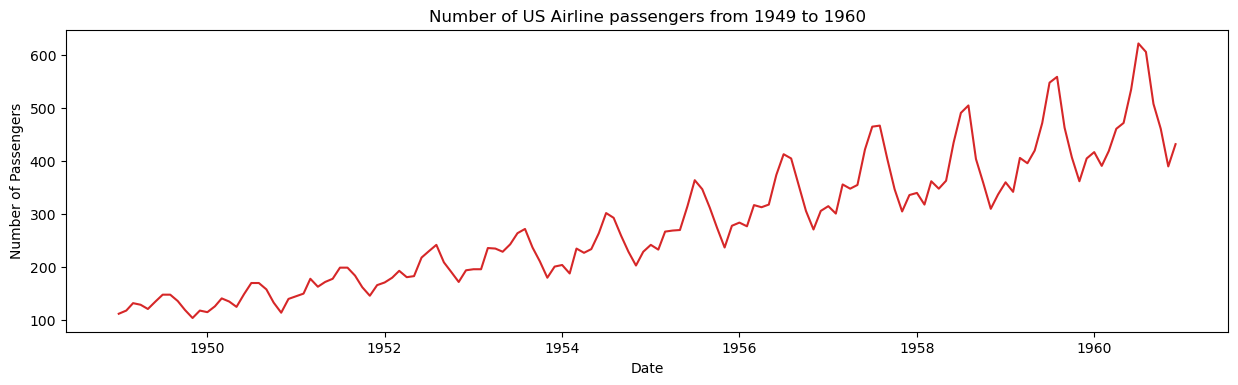

In [12]:
plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Number of US Airline passengers from 1949 to 1960')

### 1.3. Resampling time series data
Resampling time series data refers to the act of summarizing data over different time periods. For example, above you have been working with monthly data but you can resample this data quartely i.e. 3months. To aggregate or temporal resample the data for a time period, you can take all of the values for each month and summarize them. If you want annual number of passengers yu can use the resample() method together with .sum().

In [ ]:
# Set date column as index: not run
#df_index = df.set_index('Date')
#resample the data one last time, this time from monthly to yearly using: df.resample('Y').sum() with 'Y' specifying that you want to aggregate, or resample, by year.
#df_annual = df_index.resample('Y').sum()

In [13]:
#Quartely data
df1 =df.set_index('Date').resample('3M').mean()
df1.head()

,Number of Passengers
Date,
1949-01-31,112.000000
1949-04-30,126.333333
1949-07-31,134.666667
1949-10-31,134.333333
1950-01-31,112.333333


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 1949-01-31 to 1961-01-31
Freq: 3M
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number of Passengers  49 non-null     float64
dtypes: float64(1)
memory usage: 784.0 bytes


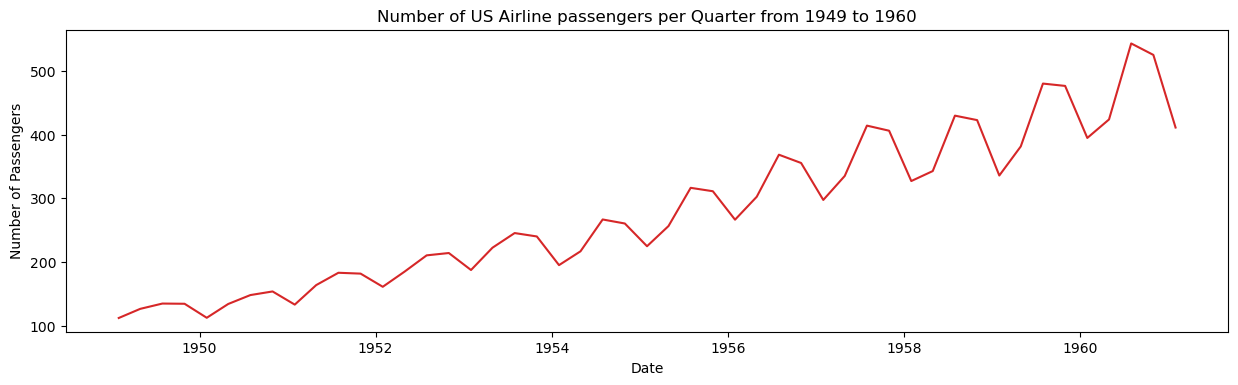

In [15]:
#Visualize the Time Series
#remember you changed the date column to the index so your x-axis will have to be modified here
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df1, x=df1.index, y=df1f['Number of Passengers'], title='Number of US Airline passengers per Quarter from 1949 to 1960')

### 1.4. Time Series Lag Plot
A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. So a first order lag plot is using a lag of 1. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

For plotting lag chart we can use Pandas lag_plot() function. The x-axis contains y(t) and y-axis contains the data point after 1 lag point i.e. y(t+1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

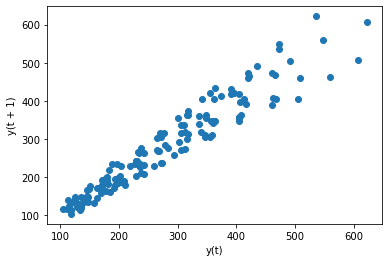

In [16]:
pd.plotting.lag_plot(df['Number of Passengers'])

So we can see a linear trend in our data and the data set is not Random. There is no outliers as such also detected in this data set.

## 2. Patterns in a Time Series

If we go back to the monthly time series we see that it follws a certain repetitive pattern every year. Any time series visualization may consist of the following components: Base level + Trend + Seasonality + Error. Base level: this is the mean value of time-series data. 

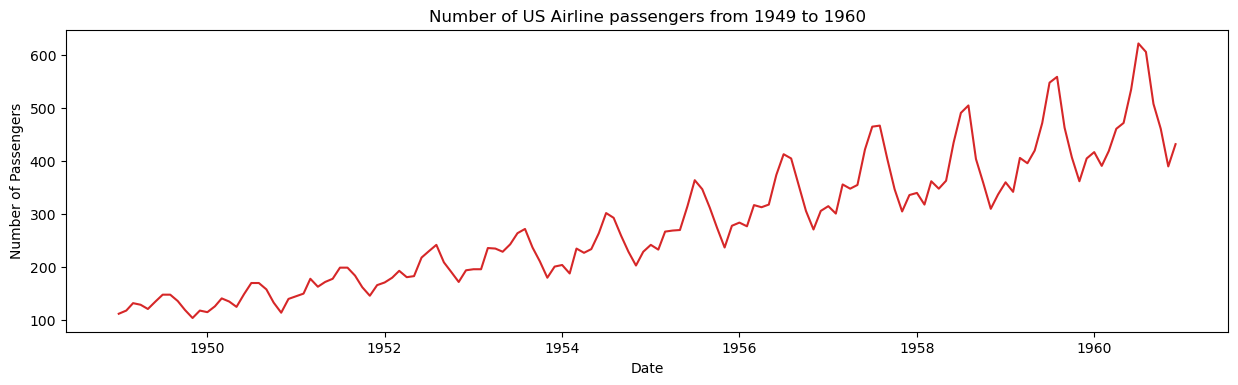

In [17]:
#Visualize the Time Series
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Number of US Airline passengers from 1949 to 1960')

In this time series, we can see, at least, two things: (1) a positive trend and (2) yearly minima and maxima approximately in the same months. This means we might be observing a seasonal pattern here too. Let’s take a closer look. 

### 2.1. Decomposition of a Time Series
Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.

There are several ways to implement this: using [moving averages](https://otexts.org/fpp2/classical-decomposition.html), [X11](https://otexts.org/fpp2/x11.html), [SEATS](https://otexts.org/fpp2/seats.html) and [STL](https://otexts.org/fpp2/stl.html). Here we will use the moving averages approach that was implemented in [statsmodel](https://www.statsmodels.org/stable/index.html)

First, we need to choose if we will use model=additive or model=multiplicative. In order to do that, we have to look at our time series and follow the Hyndman & Athanasopoulos guidelines

In [ ]:
plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Number of US Airline passengers from 1949 to 1960')

It seems that the variance around the trend (remember the linear trend estimation?) is increasing throughout time. To check that visually, let's use the `pandas.Series.rolling.std` and plot the result

<AxesSubplot:>

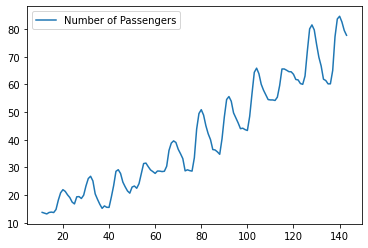

In [18]:
df.rolling(12).std().plot()

Using the previous plot, we can confirm that the variance of this time series increases throughout time. As such, let's use the multiplicative model for decomposition. Using seasonal_decompose we can access the estimation of the following components:
* Trend-Cyclical
* Seasonal
* Irregular

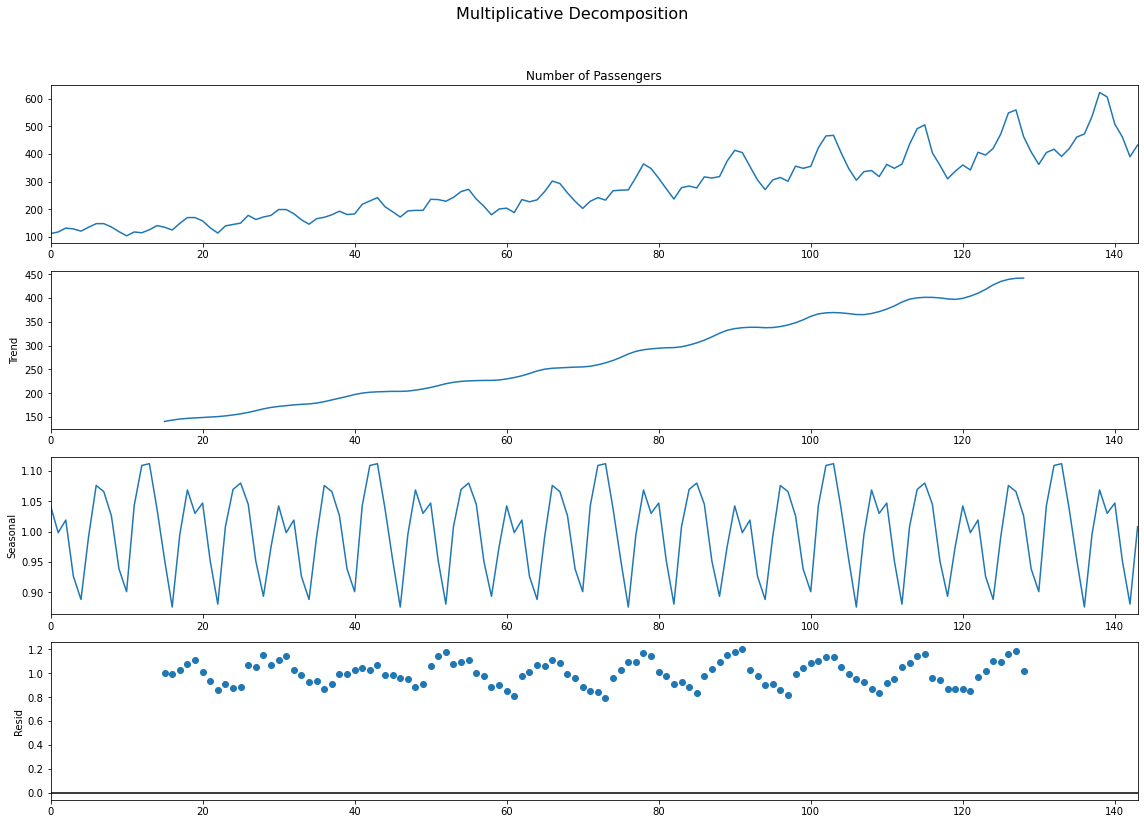

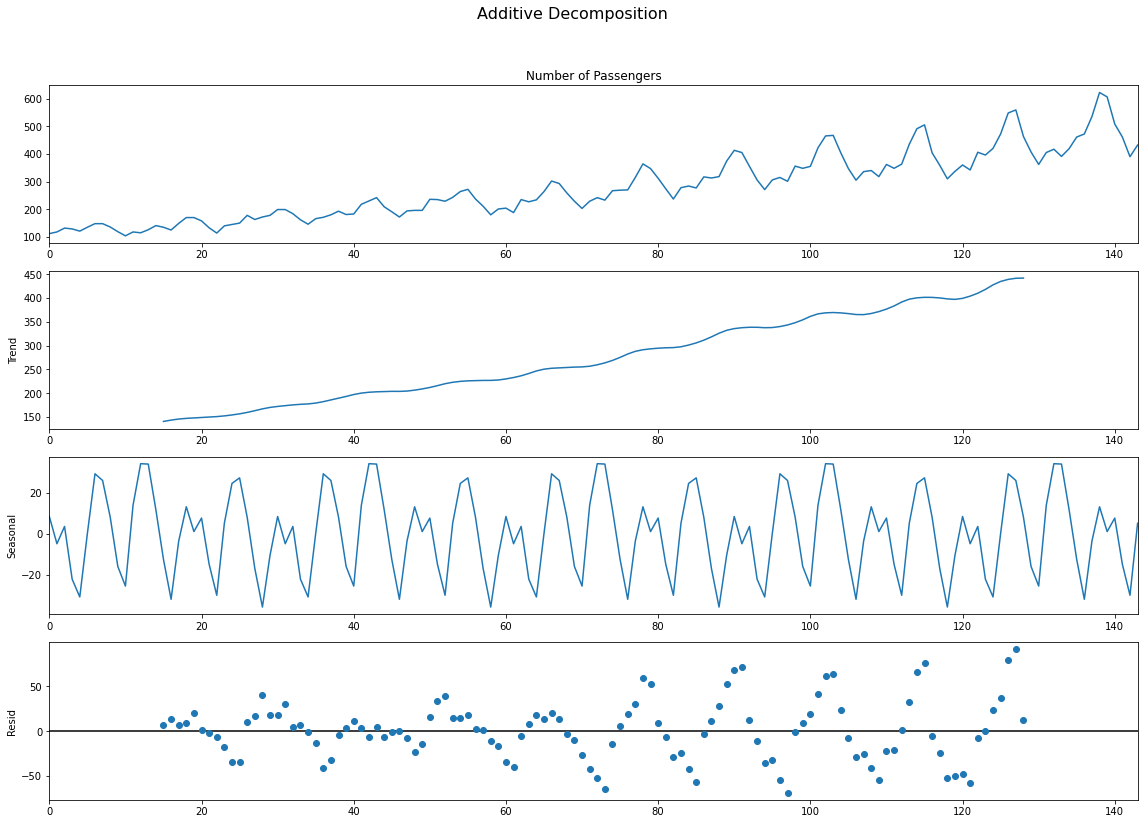

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Number of Passengers'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [23]:
multiplicative_decomposition.trend.head(25)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15    140.850000
16    143.650000
17    145.866667
18    147.283333
19    148.250000
20    149.183333
21    150.083333
22    151.000000
23    152.483333
24    154.466667
Name: trend, dtype: float64

In [21]:
multiplicative_decomposition.seasonal.head(10)

0    1.042448
1    0.998292
2    1.019082
3    0.926181
4    0.888051
5    0.991710
6    1.076159
7    1.066042
8    1.026230
9    0.938381
Name: seasonal, dtype: float64

In [24]:
multiplicative_decomposition.resid.head(20)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15    1.005242
16    0.993885
17    1.026400
18    1.080000
19    1.113140
Name: resid, dtype: float64

## Bonus
### Detrend a Time Series 

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the least squares fit')

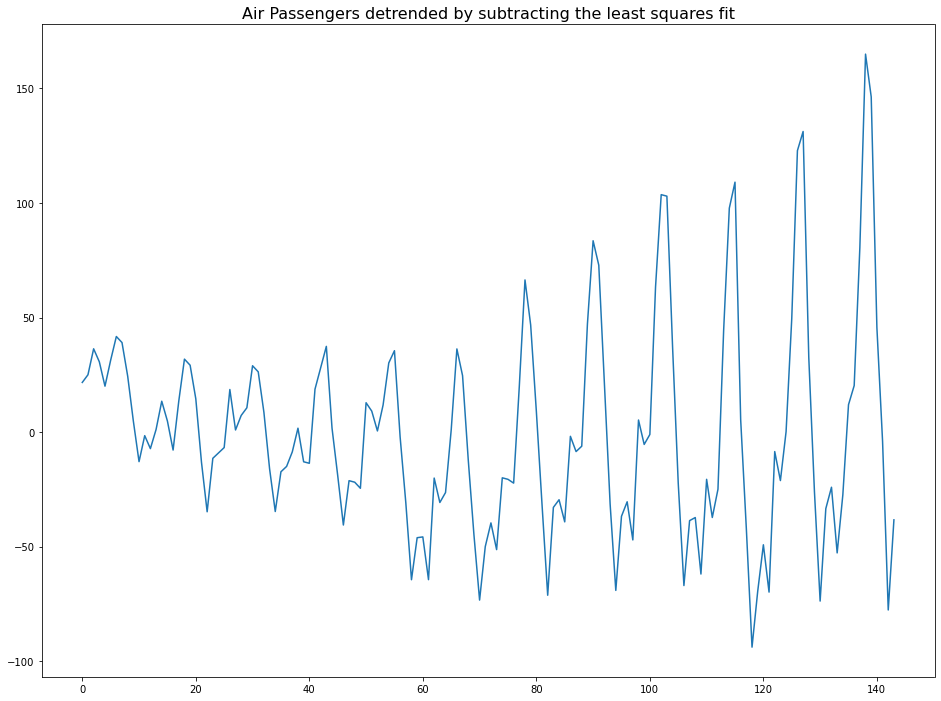

In [25]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(df['Number of Passengers'].values)
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the least squares fit', fontsize=16)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

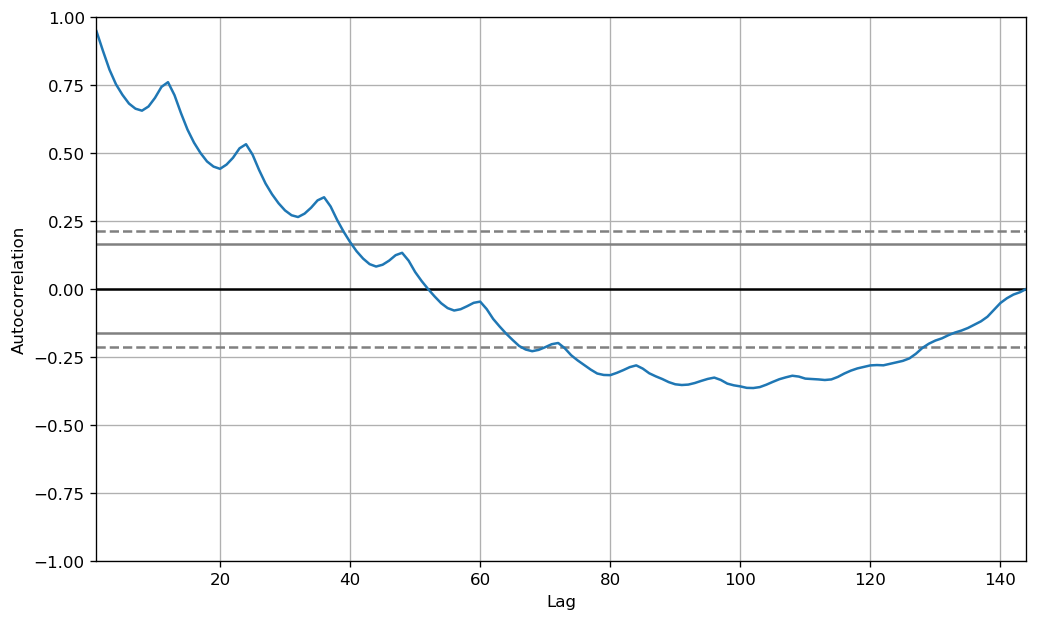

In [26]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['Number of Passengers'].tolist())

### Autocorrelation and Partial Autocorrelation Functions

C:\Users\Girls Who Code\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


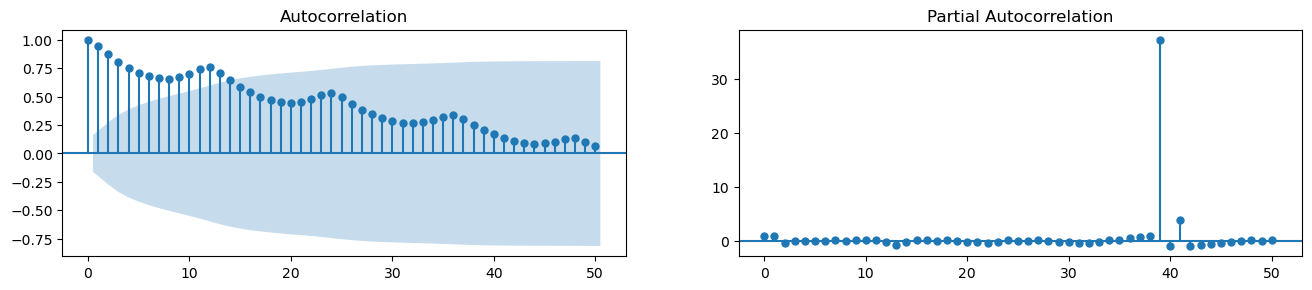

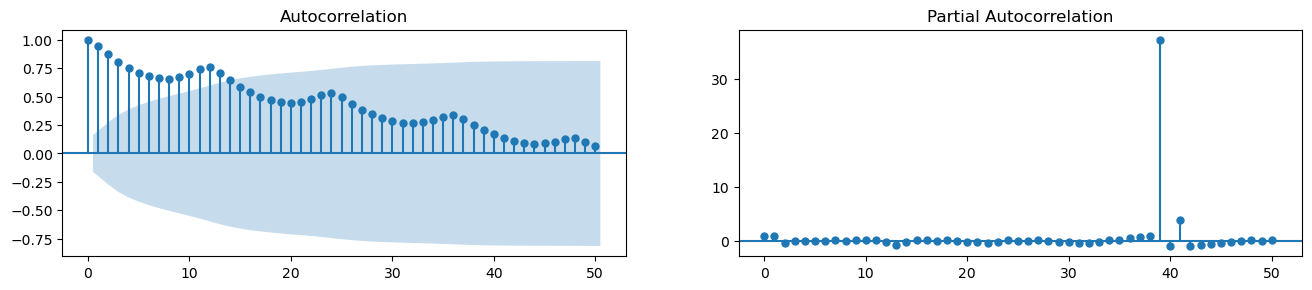

In [29]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Number of Passengers'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['Number of Passengers'].tolist(), lags=50, ax=axes[1])

Have a look at this resource to do more analysis on this dataset - https://www.kaggle.com/manas13/time-series-air-passenger